<a href="https://colab.research.google.com/github/yasyamauchi/education/blob/main/2023AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023年 人工知能 補助教材  
### 東洋大学理工学部生体医工学科

# Google Colabの練習  
角括弧[  ]をクリックして実行(その日の初回は時間がかかる)  

In [ ]:
print("こんにちは！")

# 3-2 AIと社会

## スクレイピングの例

In [ ]:
import requests
response = requests.get('https://www.kantei.go.jp/jp/headline/kansensho/vaccine.html')
response.encoding = response.apparent_encoding  # そのままだと文字化けするので対策
text = response.text
ippan_start = text.find('総接種回数')             # 「総接種接種」という文字を探す
number_start = text.find('bold',ippan_start)+7     # 接種者数の数字の最初の位置を探す
number_end = text.find('<',number_start)        # 接種者数の数字の終わる位置を探す
print(text[number_start:number_end])            # 接種者数を表示する

## オープンソースデータの例

* PhysioNet https://www.physionet.org  
生理学的データ（多くはECG）を数多く集めたデータセット  
* HealthData.gov https://healthdata.gov  
米国の医療データ(またはそこへのリンク)  
* e-GOV data portal https://data.e-gov.go.jp/info/ja  
日本の行政機関のオープンデータのポータルサイト



# 3-3 機械学習の基礎と展望(前半：教師あり学習)

グラフで日本語を表示するために一度だけ実行

In [ ]:
!pip install japanize-matplotlib

## 回帰  
例題：A社の複数の商品について，広告費(cost)と売上(sales)のデータを得た
広告費から売上を予測したい．

### まずデータを可視化する

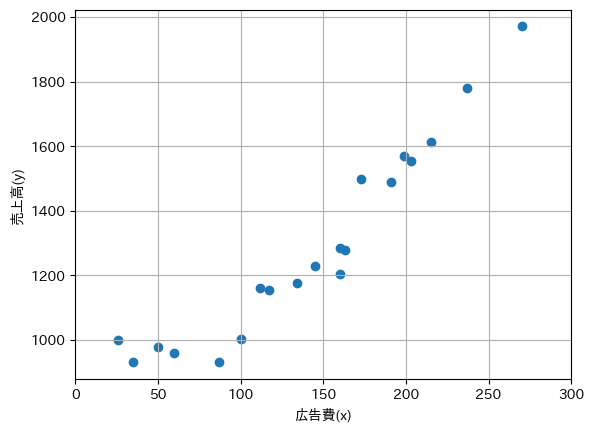

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# 散布図を描画
plt.grid()
plt.xlim(0,300)
plt.xlabel("広告費(x)")
plt.ylabel("売上高(y)")
plt.scatter(x, y)

### 線形回帰モデル(単回帰分析)

$y = ax + b$ のaとbを変えて，赤い線をデータに近づけてみよう．  
誤差Jがどうなるか観察しよう．

a= 2
b= 800
J=1432989.0


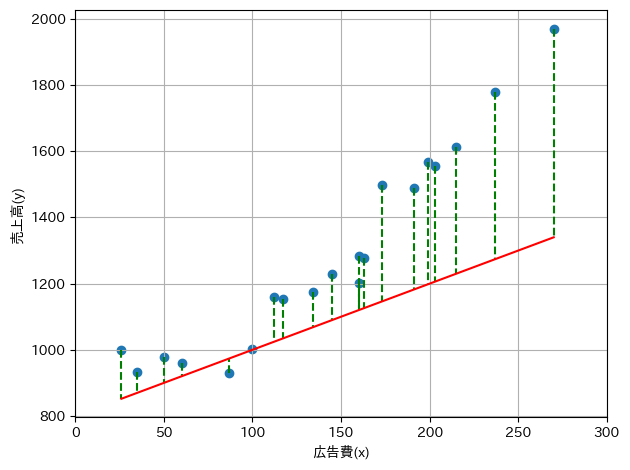

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

a = float(input('a= '))  # 最初は2あたりから試す
b = float(input('b= '))  # 最初は800あたりから試す

ylin = [a*i + b for i in x]  # y = ax + b

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('広告費(x)')  # x軸ラベル
axe.set_ylabel('売上高(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

scipyライブラリを使って最小二乗法を実行してみる．



a=4.1862276459918215,b=694.2336079340677
J=174154.49928163318


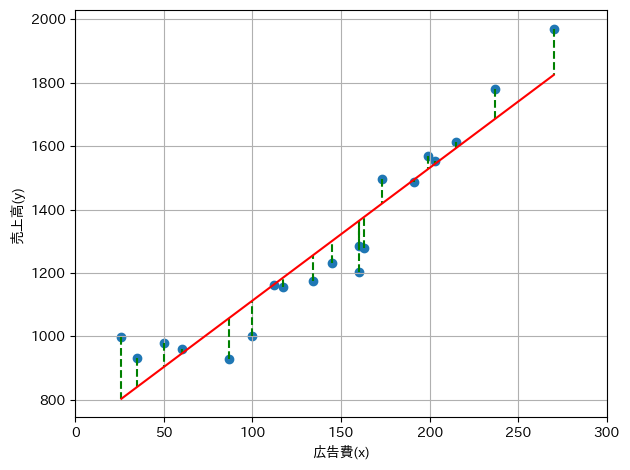

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - (param[0]*x + param[1])
    return residual

param1 = [0, 0]
result = optimize.leastsq(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result[0][0]
b = result[0][1]
print('a={},b={}'.format(a,b))

ylin = [a*i + b for i in x]  # y = ax + b

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('広告費(x)')  # x軸ラベル
axe.set_ylabel('売上高(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

### 多項式回帰モデル(重回帰分析)

$y = ax^2 + bx + c$ のaとbとcを変えて，赤い線をデータに近づけてみよう．  
誤差Jがどうなるか観察しよう．

a= 0.03
b= 0.2
c= 700
J=2473993.5859000003


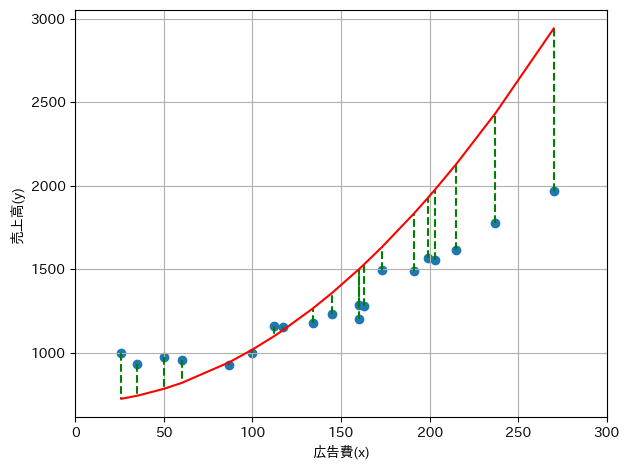

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

a = float(input('a= '))  # 最初は0.03あたりから試す
b = float(input('b= '))  # 最初は0.2あたりから試す
c = float(input('c= '))  # 最初は700あたりから試す

ylin = [a*i*i + b*i + c for i in x]  # y = ax^2 + bx + c

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('広告費(x)')  # x軸ラベル
axe.set_ylabel('売上高(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

これもscipyライブラリを使って最小二乗法を実行してみる．

a=0.01589693100476773,b=-0.24560923772845644,c=932.5667594436436
J=58668.154113541335


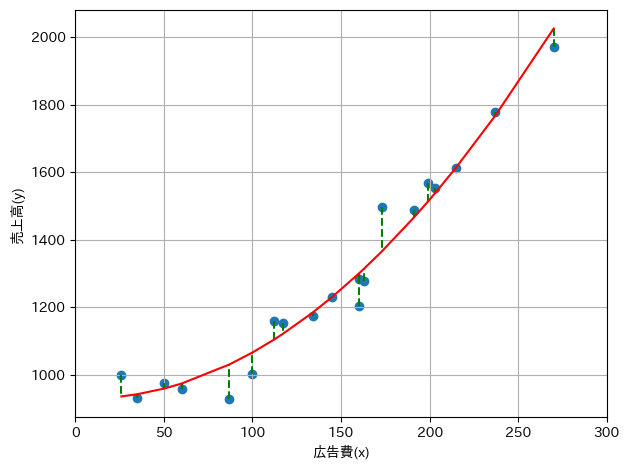

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - (param[0]*x*x + param[1]*x + param[2])
    return residual

param1 = [0.03, 0.2, 700]
result = optimize.leastsq(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result[0][0]
b = result[0][1]
c = result[0][2]
print('a={},b={},c={}'.format(a,b,c))

ylin = [a*i*i + b*i + c for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('広告費(x)')  # x軸ラベル
axe.set_ylabel('売上高(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

**よっしゃ！6次関数にしてみよう！**  
$y = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g$

a=2.9954e-11,b=-2.9532e-08,c=1.1476e-05,d=-0.002294,e=0.26944,f=-14.69,g=1227.2
J=46090.17976712776


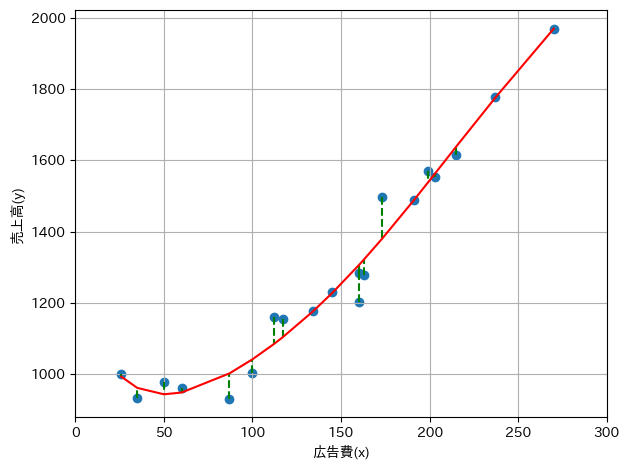

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが広告費，yが売上高
x = [26,35,50,60,87,100,112,117,134,145,160,160,163,173,191,199,203,215,237,270]
y = [999,933,978,960,930,1002,1161,1155,1176,1230,1203,1284,1278,1497,1488,1569,1554,1614,1779,1971]

# ここからscipy.optimizeによるフィッテイング
def func1(param,x,y):
    residual = y - (param[0]*x*x*x*x*x*x + param[1]*x*x*x*x*x + param[2]*x*x*x*x + param[3]*x*x*x + param[4]*x*x + param[5]*x + param[6])
    return residual

param1 = [0,0,0,0,0,0,0]
result = optimize.leastsq(func1, param1, args=(np.array(x), np.array(y)))
# フィッテイング終了

a = result[0][0]
b = result[0][1]
c = result[0][2]
d = result[0][3]
e = result[0][4]
f = result[0][5]
g = result[0][6]
print('a={:.5},b={:.5},c={:.5},d={:.5},e={:.5},f={:.5},g={:.5}'.format(a,b,c,d,e,f,g))

ylin = [a*i*i*i*i*i*i + b*i*i*i*i*i + c*i*i*i*i + d*i*i*i + e*i*i + f*i + g for i in x]

# 誤差を合計する
J = 0
for i in range(len(x)):
    J += (ylin[i]-y[i])**2
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
print('J={}'.format(J))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('広告費(x)')  # x軸ラベル
axe.set_ylabel('売上高(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 300]) # x方向の描画範囲を指定
axe.scatter(x,y)
for i in range(len(x)):
    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

あんまり変わらない…

## 分類  
例題：ある昆虫のホルモン成分AとBの含有量から，雄と雌を分類する


### まずデータを可視化する

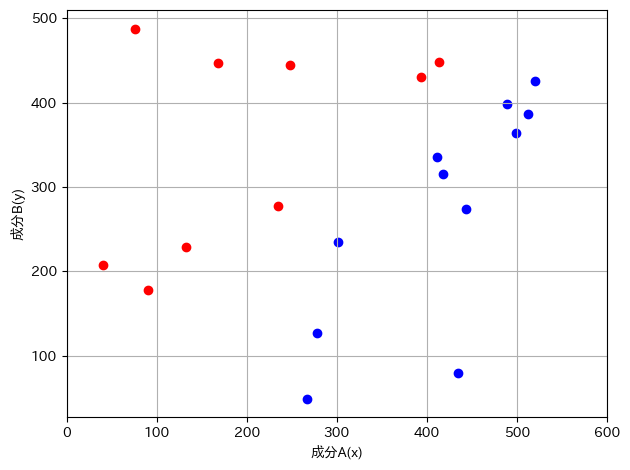

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが成分A，yが成分B，tが性別(-1がメス，1がオス)
x = [41,76,168,235,133,248,414,394,91,489,435,520,411,499,444,301,418,267,512,278]
y = [208,488,447,277,229,445,448,431,178,399,80,426,336,364,274,235,315,49,387,127]
t = [-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1]

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('成分A(x)')  # x軸ラベル
axe.set_ylabel('成分B(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 600]) # x方向の描画範囲を指定
axe.scatter(x[:9],y[:9],color="r")
axe.scatter(x[9:],y[9:],color="b")
#for i in range(len(x)):
#    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
#axe.plot(x,ylin,color="r")
fig.tight_layout()  # レイアウトの設定
plt.show()

### 一次直線で分類してみる

$y = ax + b$ のaとbを変えて，緑の線で性別(赤と青の点)を分けてみよう．

a= 1.8
b= -100
3個が誤り


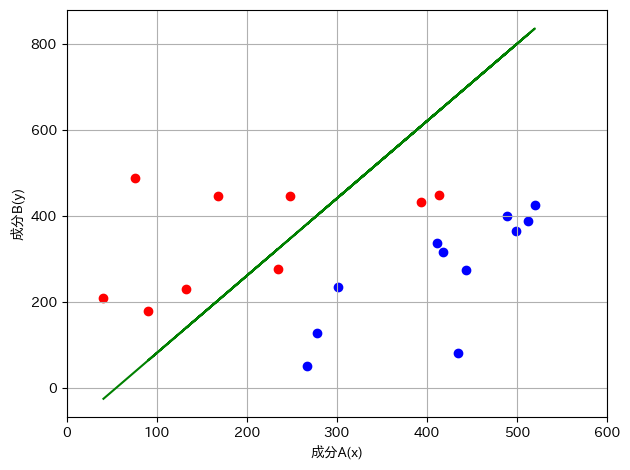

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import optimize

# xが成分A，yが成分B，tが性別(-1がメス，1がオス)
x = [41,76,168,235,133,248,414,394,91,489,435,520,411,499,444,301,418,267,512,278]
y = [208,488,447,277,229,445,448,431,178,399,80,426,336,364,274,235,315,49,387,127]
t = [-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1]

a = float(input('a= '))  # 最初は1.8あたりから試す
b = float(input('b= '))  # 最初は-100あたりから試す

ylin = [a*i + b for i in x]  # y = ax + b

residual = [p - q for p, q in zip(y, ylin)]

# 間違いのカウント
nerror = 0
for i in range(len(x)):
    if t[i]*residual[i]>0:
        nerror += 1
print('{}個が誤り'.format(nerror))

# グラフの描画
fig, axe = plt.subplots()
axe.set_xlabel('成分A(x)')  # x軸ラベル
axe.set_ylabel('成分B(y)')  # y軸ラベル
axe.grid()            # 罫線
axe.set_xlim([0, 600]) # x方向の描画範囲を指定
axe.scatter(x[:9],y[:9],color="r")
axe.scatter(x[9:],y[9:],color="b")
#for i in range(len(x)):
#    axe.plot([x[i],x[i]],[y[i],ylin[i]],color="g",linestyle = "dashed")
axe.plot(x,ylin,color="g")
fig.tight_layout()  # レイアウトの設定
plt.show()

＜より複雑な分類に関する参考文献＞  
https://free.kikagaku.ai/tutorial/basic_of_machine_learning/learn/machine_learning_classification
